In [15]:
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
df=pd.read_csv("startupdata.csv")
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [17]:
df.corr(method="pearson")

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [18]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

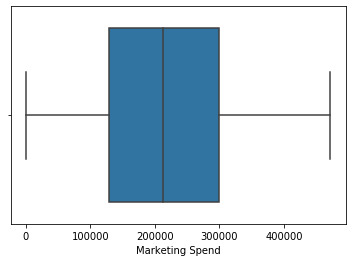

In [19]:
sns.boxplot(df["Marketing Spend"])

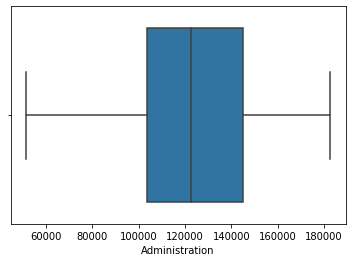

In [20]:
sns.boxplot(df["Administration"])

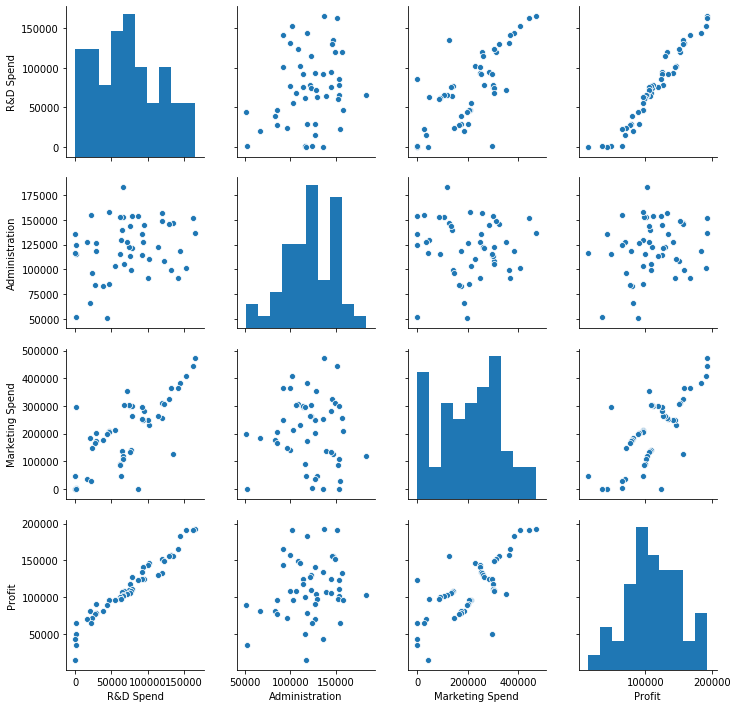

In [21]:
sns.pairplot(df)

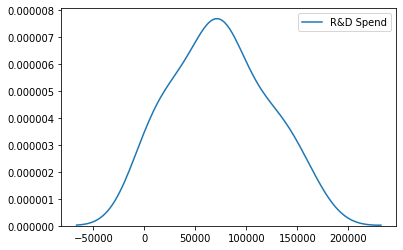

In [8]:
sns.kdeplot(df["R&D Spend"])

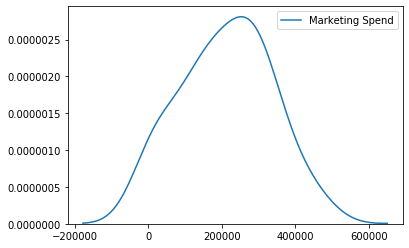

In [9]:
sns.kdeplot(df["Marketing Spend"])

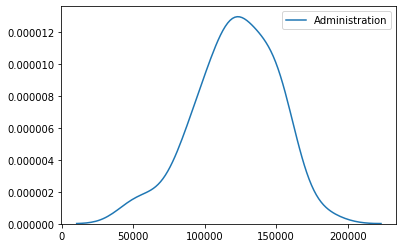

In [10]:
sns.kdeplot(df["Administration"])

In [22]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
X=df.drop(columns=["Profit","State"])
y=df["Profit"]

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [26]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
               }
            },
             'ridge': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [27]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.932376,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,lasso,0.932376,"{'alpha': 2, 'selection': 'cyclic'}"
2,ridge,0.932376,{'alpha': 2}
3,decision_tree,0.836177,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.score(X_test,y_test)

0.9548961826277655

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lr.predict(X_test))
r2

0.9548961826277655

In [31]:
lasso = Lasso(alpha= 2, selection='cyclic')
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.9548961825617565

In [37]:
ChosenAlgo=lasso

In [38]:
def estimator(r_d_expenses,administration_expenses,marketing_expenses):    
    
    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses


    return ChosenAlgo.predict([x])[0]

In [39]:
estimator(142107.34,91391.77,366168.42)

173065.66593080817

In [45]:
ChosenAlgo.predict([[142107.34,91391.77,366168.42]])

array([173065.66593081])

In [40]:
import pickle
pickle.dump(ChosenAlgo,open('profitPredictor.pkl','wb'))

In [41]:
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
 
    f.write(json.dumps(columns))

In [43]:
columns

{'data_columns': ['r&d spend', 'administration', 'marketing spend']}